In [34]:
import pandas as pd
from os.path import exists, join, curdir
from os import mkdir, listdir
import numpy as np
from matplotlib import pyplot

In [35]:
LOGDIR = join(curdir, 'logs')

In [36]:
def get_subdirs(logpath = LOGDIR, dataset=None):
    folders = listdir(logpath)
    paths = [join(logpath, file) for file in folders]
    if dataset is None:
        return paths
    else:
        paths = [join(logpath, folder) for folder in folders if folder == dataset]
    return paths
        
def get_files(logpath, dataset):
    model_folders = get_subdirs(logpath)
    
    dataset_folders = np.asarray([get_subdirs(model_folder, dataset) for model_folder in model_folders if len(get_subdirs(model_folder, dataset)) > 0]).flatten()
    #print(dataset_folders)
    filepaths = np.array([[join(dataset_folder, file) for file in listdir(dataset_folder)] for dataset_folder in dataset_folders]).flatten()
    #filepaths = [filepath for filepath in filepaths if 'ADAM' in filepath]
    return list(filepaths)

In [37]:
cifar10 = [filepath for filepath in get_files(LOGDIR, 'Cifar10')]
new = []
for x in cifar10:
    new += x
cifar10 = new
cifar10_gd = [filepath for filepath in cifar10 if not 'ADAM' in filepath]
cifar10_lrs = [filepath for filepath in cifar10 if 'LRS' in filepath]
cifar10_ad = [filepath for filepath in cifar10 if 'ADAM' in filepath]
cifar100 = [filepath for filepath in get_files(LOGDIR, 'Cifar100')]
cifar100_ad = [filepath for filepath in cifar100 if 'id0' in filepath]
cifar100_ld = [filepath for filepath in cifar100 if not 'LRS' in filepath]
catdog = [filepath for filepath in get_files(LOGDIR, 'CatVsDog')]
catdog_ad = [filepath for filepath in catdog if 'ADAM' in filepath]
#print(catdog)
print(cifar10)
#print(cifar100)
all_sets = cifar100+cifar10+catdog
#print(len(all_sets))

['.\\logs\\ResNet18\\Cifar10\\ResNet18_bs128_e20_idADAM.csv', '.\\logs\\ResNet18\\Cifar10\\ResNet18_bs512_e20_idADAM.csv', '.\\logs\\ResNet34\\Cifar10\\ResNet34_bs512_e20_idADAM.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs128_e20_id0.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs128_e20_idADAM.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs128_e20_idLRS.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs128_e20_idRADAM.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs32_e20_id0.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs32_e20_idADAM.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs32_e20_idLRS.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs32_e20_idRADAM.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs512_e20_id0.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs512_e20_idADAM.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs512_e20_idLRS.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs512_e20_idRADAM.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs8_e20_id0.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs8_e20_idADAM.csv', '.\\logs\\VGG11\\Cifar10\\VGG11_bs8_e20_idLRS.csv', '.\\logs\\VGG1

160 160 160


Text(0, 0.5, 'Accuracy')

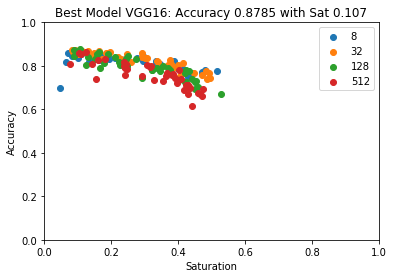

In [67]:
def compute_avg_sat(df):
    return np.mean(df.values)

def filter_file(file, mode='train', ignore='_classifier-6', final_epoch=49):
    df = pd.read_csv(file, sep=';', index_col=0)
    df = df[df.index == final_epoch]
    if len(df) == 0:
        return -1, -1, -1
    cols = list(df.columns)
   #print(cols)
    filtered_cols = []
    accuracy = -1
    loss = -1
    avg_sat = -1
    for col in cols:
        if 'accuracy' in col and 'test' in col:
            accuracy = df[col].values[0]
            continue
        if 'loss' in col and 'test' in col:
            loss = df[col].values[0]
            continue
        if ignore in col or 'train' in col or 'test' in col or 'training' in col:
            continue
       #print(col)
        filtered_cols.append(col)
    df = df[filtered_cols]
    return compute_avg_sat(df),accuracy, loss
avg_sat, acc, loss, names, batch_size = [], [], [], [], []
maximum_acc = -1
for dataset in catdog_ad:
    if 'bs' in dataset:
        #print(dataset)
        sat, ac, los = filter_file(dataset, final_epoch=19)
        sat = sat / 100
        avg_sat.append(sat)
        acc.append(ac)
        loss.append(los)
        names.append(dataset.split('_bs')[0].split('\\')[-1])
        batch_size.append((int(dataset.split('bs')[1].split('_')[0])))
        
        if maximum_acc < ac:
            maximum_acc = ac
            maximum_sat = sat
            best_ds = dataset.split('_bs')[0].split('\\')[-1]
print(len(avg_sat), len(acc), len(loss))
avg_sat, acc, batch_size = np.asarray(avg_sat), np.asarray(acc), np.asarray(batch_size)
pyplot.set_cmap('YlOrRd_r')
for bs in [8, 32, 128, 512]:
    pyplot.scatter(avg_sat[batch_size==bs], acc[batch_size==bs], label=bs)
pyplot.legend()
#for i in range(len(avg_sat)):
#    pyplot.text(avg_sat[i], acc[i], names[i])
pyplot.title('Best Model {}: Accuracy {} with Sat {}'.format(best_ds, maximum_acc, maximum_sat))
pyplot.ylim((0,1))
pyplot.xlim((0,1))
pyplot.xlabel('Saturation')
pyplot.ylabel('Accuracy')

240 240 240


Text(0, 0.5, 'Accuracy')

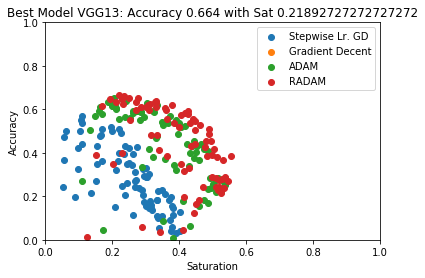

In [76]:
def compute_avg_sat(df):
    return np.mean(df.values)

def filter_file(file, mode='train', ignore='_classifier-6', final_epoch=49):
    df = pd.read_csv(file, sep=';', index_col=0)
    df = df[df.index == final_epoch]
    if len(df) == 0:
        return -1, -1, -1
    cols = list(df.columns)
   #print(cols)
    filtered_cols = []
    accuracy = -1
    loss = -1
    avg_sat = -1
    for col in cols:
        if 'accuracy' in col and 'test' in col:
            accuracy = df[col].values[0]
            continue
        if 'loss' in col and 'test' in col:
            loss = df[col].values[0]
            continue
        if ignore in col or 'train' in col or 'test' in col or 'training' in col:
            continue
       #print(col)
        filtered_cols.append(col)
    df = df[filtered_cols]
    return compute_avg_sat(df),accuracy, loss
avg_sat, acc, loss, names, optimizers = [], [], [], [], []
maximum_acc = -1
for dataset in cifar100:
    if 'bs' in dataset and not 'id0' in dataset:
        sat, ac, los = filter_file(dataset, final_epoch=49)
        sat = sat / 100
        avg_sat.append(sat)
        acc.append(ac)
        loss.append(los)
        names.append(dataset.split('_bs')[0].split('\\')[-1])
        optimizers.append((dataset.split('_id')[1]).split('.csv')[0])
        if optimizers[-1] == '0':
            optimizers[-1] = 'Gradient Decent'
        elif optimizers[-1] == 'LRS':
            optimizers[-1] = 'Stepwise Lr. GD'
        if maximum_acc < ac:
            maximum_acc = ac
            maximum_sat = sat
            best_ds = dataset.split('_bs')[0].split('\\')[-1]
print(len(avg_sat), len(acc), len(loss))
avg_sat, acc, optimizers = np.asarray(avg_sat), np.asarray(acc), np.asarray(optimizers)
pyplot.set_cmap('YlOrRd_r')
for opt in ['Stepwise Lr. GD', 'Gradient Decent', 'ADAM', 'RADAM']:
    pyplot.scatter(avg_sat[optimizers==opt], acc[optimizers==opt], label=opt)
pyplot.legend()
#for i in range(len(avg_sat)):
#    pyplot.text(avg_sat[i], acc[i], names[i])
pyplot.title('Best Model {}: Accuracy {} with Sat {}'.format(best_ds, maximum_acc, maximum_sat))
pyplot.ylim((0,1))
pyplot.xlim((0,1))
pyplot.xlabel('Saturation')
pyplot.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

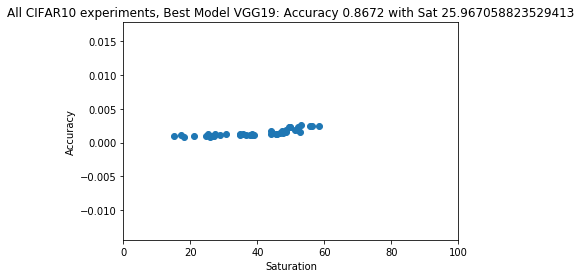

In [118]:
avg_sat, acc, loss, label = [], [], [], []
maximum_acc = -1
for dataset in cifar10_ad:
    if 'bs512' in dataset:
        sat, ac, los = filter_file(dataset, final_epoch=19)
        avg_sat.append(sat)
        acc.append(ac)
        loss.append(los)
        label.append(dataset.split('_bs')[0].split('\\')[-1])
        if maximum_acc < ac:
            maximum_acc = ac
            maximum_sat = sat
            best_dataset = dataset.split('_bs')[0].split('\\')[-1]
#print(len(avg_sat), len(acc), len(loss))
pyplot.scatter(avg_sat, loss, label=label)
#for x,y,l in zip(avg_sat, acc, label):
#    pyplot.annotate(l,(x,y))
pyplot.title('All CIFAR10 experiments, Best Model {}: Accuracy {} with Sat {}'.format(best_dataset ,maximum_acc, maximum_sat))
#pyplot.ylim((0.00, 0.06))#(0,1))
pyplot.xlim((0,100))
pyplot.xlabel('Saturation')
pyplot.ylabel('Accuracy')

In [195]:
catdog

['.\\logs\\VGG11\\CatVsDog\\VGG11_bs128_e20_id0.csv',
 '.\\logs\\VGG11\\CatVsDog\\VGG11_bs32_e20_id0.csv',
 '.\\logs\\VGG11\\CatVsDog\\VGG11_bs512_e20_id0.csv',
 '.\\logs\\VGG11\\CatVsDog\\VGG11_bs60_e20_id0.csv',
 '.\\logs\\VGG11\\CatVsDog\\VGG11_bs8_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs128_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs32_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs512_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs60_e20_id0.csv',
 '.\\logs\\VGG11_S\\CatVsDog\\VGG11_S_bs8_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs128_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs32_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs512_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs60_e20_id0.csv',
 '.\\logs\\VGG11_XS\\CatVsDog\\VGG11_XS_bs8_e20_id0.csv',
 '.\\logs\\VGG11_XXS\\CatVsDog\\VGG11_XXS_bs128_e20_id0.csv',
 '.\\logs\\VGG11_XXS\\CatVsDog\\VGG11_XXS_bs32_e20_id0.csv',
 '.\\logs\\VGG11_XXS\\CatVsDo